# Barabasi Albert

In [37]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it
import time
import random

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [38]:
def nice_plot_network(G):
    v_degrees = np.array(list(dict(nx.degree(G)).values()))
    nx.draw(G, node_size = 1 * v_degrees, node_color = 'blue', alpha = 0.5, edge_color = 'pink')
    return None

#We load the facebook data
FbData = np.loadtxt("facebook_combined.txt.gz")
FbData = FbData.astype(int)

#We plot the facebook data graph
H = nx.Graph()
H.add_edges_from(FbData)
#nice_plot_network(H)

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


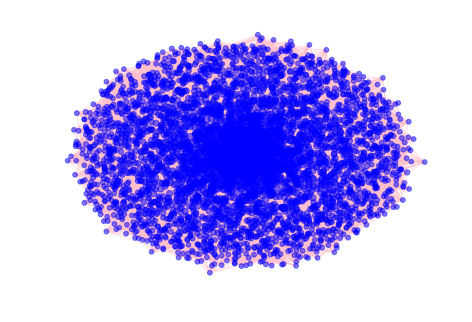

In [39]:
B = nx.barabasi_albert_graph(4039, 22)
nice_plot_network(B)
plt.show() 

In [40]:
def print_network_chars(G):
    vertex_degrees = list(dict(nx.degree(G)).values())
    plt.hist(vertex_degrees, 
         bins = np.linspace(np.min(vertex_degrees),
                          1 + np.max(vertex_degrees), 20),
         facecolor='blue', alpha=0.75, rwidth = 0.9) 
    plt.title("Vertex degree distribution")
    plt.grid(True)
    plt.show()
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    CC = nx.average_clustering(G)
    print("|V| =", n)
    print("|E| =", m)
    print("Average degree is", 2 * m / n)
    print("CC =", CC)
    print("Average path length is", nx.average_shortest_path_length(G))
    return None

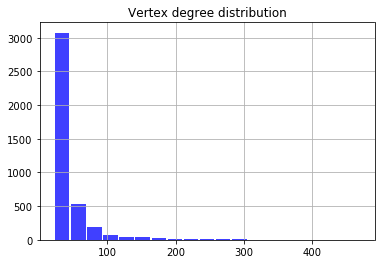

|V| = 4039
|E| = 88374
Average degree is 43.76033671700916
CC = 0.037667131708430564
Average path length is 2.5110758269330686


In [41]:
print_network_chars(B)

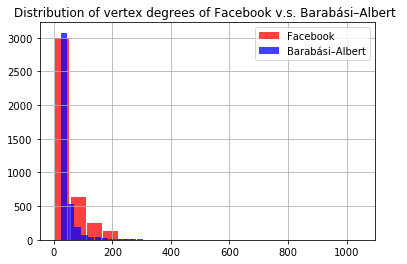

Facebook
|V| =  4039
|E| =  88234
CC =  0.6055467186200876
Average path length =  3.6925068496963913
Average degree =  43.69101262688784
Number of triangles =  1612010.0
Diameter =  8

Barabasi-Albert
|V| =  4039
|E| =  88374
CC =  0.037667131708430564
Average path length =  2.5110758269330686
Average degree =  43.76033671700916
Number of triangles =  85544.0
Diameter =  4


In [42]:
vertex_degrees=list(dict(nx.degree(H)).values())
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='red', label = 'Facebook', alpha=0.75, rwidth=0.9)

vertex_degrees=list(dict(nx.degree(B)).values())
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='blue', label = 'Barabási–Albert', alpha=0.75, rwidth=0.9)

plt.title('Distribution of vertex degrees of Facebook v.s. Barabási–Albert ')

plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

print('Facebook')
print('|V| = ', nx.number_of_nodes(H))
print('|E| = ', nx.number_of_edges(H))
print('CC = ', nx.average_clustering(H))
print('Average path length = ', nx.average_shortest_path_length(H))
print('Average degree = ', (2*nx.number_of_edges(H)/nx.number_of_nodes(H)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(H).todense()**3))/6))
print('Diameter = ', nx.diameter(H))
print('')

print('Barabasi-Albert')
print('|V| = ', nx.number_of_nodes(B))
print('|E| = ', nx.number_of_edges(B))
print('CC = ', nx.average_clustering(B))
print('Average path length = ', nx.average_shortest_path_length(B))
print('Average degree = ', (2*nx.number_of_edges(B)/nx.number_of_nodes(B)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(B).todense()**3))/6))
print('Diameter = ', nx.diameter(B))

The Barabàsi–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Scale-free implies that the node in this model exhibits ‘power-law’ distribution. This model has two important features: growth and preferential attachment. Growth refers to the increasing in number of nodes over time, while preferential attachment means that if a node has more edges, it has a higher probability to receive new edges.
In this model, vertices are added in to the network one by one, and the probability of a node receiving a new vertex follows the formula $x=\frac{k_{i}} {\sum_{j=0}^{n}k_{j}}$, where $k_{i}$ is the degree of vertex i and the denominator is the sum of degrees of all pre-existing nodes.

The BA models has two input parameters: 

1)	N (number of nodes)

2)	k (mean degree of a vertex)

Initially, we construct a random Erdós-Rényi  (ER) model with number of vertices N = 100 and  p = 0.01801, the probability of vertices connected to the node. Then the preferential attachment will start from the 101th vertex, where each vertex is connected to a node with a probability of $x=\frac{k_{i}} {\sum_{j=0}^{n}k_{j}}$. 

#insert graph


The BA model has similiar feature as the Facebook model whereby each nodes represent a user and the edges shows the connection between two users. In BA model, the nodes with more vertices connected to it has a higher probability of receiving a new vertex, this is the same as Facebook in reality, if a user has more connections with other users, the user will have a higher chance to form a connection with new user. 

In addition, the BA model and Facebook model has similar average vertex degree refers to the average number of edges a vertex is connected with. A higher average degree means the spread of information from a node can be easily spread to many other nodes. This would means that information can be spread from all directions resulting in a rapid and efficient network of information spread. 

However, the clustering coefficient, number of triangle formed among nodes, average path length, and diameter of the BA model is lower from the Facebook model. 

Number of triangle tells us how many 3 way relationship of a node to their surround nodes are formed in the network model. It can be closely related with the average CC as it tells us how closely the neighbors of a node v are connected. A lower clustering coefficient and a smaller number of triangle form means that the spread of the information to the surrounding is not as fast as Facebook model.

The diameter(longest shortest path) is the maximum eccentricity where the eccentricity of a node v is the maximum distance from a node v to all other nodes in the network. Having a smaller diameter value shows that the spread of information is more rapid and efficient as it already the longest shortest distance to reach other members of the network. Since BA model has a smaller diameter than the Facebook model, this means that the information will be spread faster to all the nodes in the Facebook model.

Average path length is the shortest path between all pairs of nodes, it can be calculated by adding them up and dividing by the total number of pairs. This will show us the number of steps on average it takes to get from one member of network to another member. Similarly having a shorter average path length is advantageous for spread of information in a network. Since BA model has a smaller average path length than the Facebook model, this means that the information will be spread faster to all the nodes in the Facebook model.

Therefore, we can conclude that BA model is a good approximate for the Facebook model, just that the rate of spread of information for the BA model might not be a good representation for the Facebook model.